In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('C:/Users/Asus/OneDrive/Desktop/Spiced_Academy/naive-zatar-student-codes/Week3/Data/train.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
X = df[['datetime','season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered']]

In [7]:
y = df['count']

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.25, random_state= 42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((8164, 11), (2722, 11), (8164,), (2722,))

In [9]:
xtrain['datetime']  = pd.to_datetime(xtrain['datetime'], dayfirst = True)

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/2705632101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['datetime']  = pd.to_datetime(xtrain['datetime'], dayfirst = True)


In [10]:
xtrain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
2930,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,10,25
7669,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,57,194
1346,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,12,41
9432,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,70,226
453,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,1,15


In [11]:
xtrain['year'] = xtrain['datetime'].dt.year

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/4136973592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['year'] = xtrain['datetime'].dt.year


In [12]:
xtrain['day'] = xtrain['datetime'].dt.day

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/1275354300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['day'] = xtrain['datetime'].dt.day


In [13]:
xtrain['month'] = xtrain['datetime'].dt.month

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/3412509816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['month'] = xtrain['datetime'].dt.month


In [14]:
xtrain['hour'] = xtrain['datetime'].dt.hour

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/434067502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['hour'] = xtrain['datetime'].dt.hour


In [15]:
xtrain['week'] = xtrain['datetime'].dt.week

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/476659384.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  xtrain['week'] = xtrain['datetime'].dt.week
C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/476659384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['week'] = xtrain['datetime'].dt.week


In [16]:
xtrain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,day,month,hour,week
2930,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,10,25,2011,11,7,0,28
7669,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,57,194,2012,18,5,22,20
1346,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,12,41,2011,1,4,23,13
9432,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,70,226,2012,16,9,9,37
453,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,1,15,2011,1,2,23,5


In [17]:
xtest['datetime']  = pd.to_datetime(xtest['datetime'], dayfirst = True)

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/694522273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['datetime']  = pd.to_datetime(xtest['datetime'], dayfirst = True)


In [18]:
xtest['year'] = xtest['datetime'].dt.year

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/1362045320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['year'] = xtest['datetime'].dt.year


In [19]:
xtest['day'] = xtest['datetime'].dt.day

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/2462744701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['day'] = xtest['datetime'].dt.day


In [20]:
xtest['month'] = xtest['datetime'].dt.month

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/2200862996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['month'] = xtest['datetime'].dt.month


In [21]:
xtest['hour'] = xtest['datetime'].dt.hour

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/1217883633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['hour'] = xtest['datetime'].dt.hour


In [22]:
xtest['week'] = xtest['datetime'].dt.week

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/1138733905.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  xtest['week'] = xtest['datetime'].dt.week
C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/1138733905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['week'] = xtest['datetime'].dt.week


In [23]:
xtest.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,day,month,hour,week
3133,2011-07-19 11:00:00,3,0,1,1,33.62,40.150,59,0.0000,29,98,2011,19,7,11,29
5786,2012-01-16 06:00:00,1,1,0,1,4.10,6.820,54,6.0032,0,13,2012,16,1,6,3
5224,2011-12-11 18:00:00,4,0,0,1,9.84,11.365,48,12.9980,12,151,2011,11,12,18,49


<AxesSubplot:xlabel='hour'>

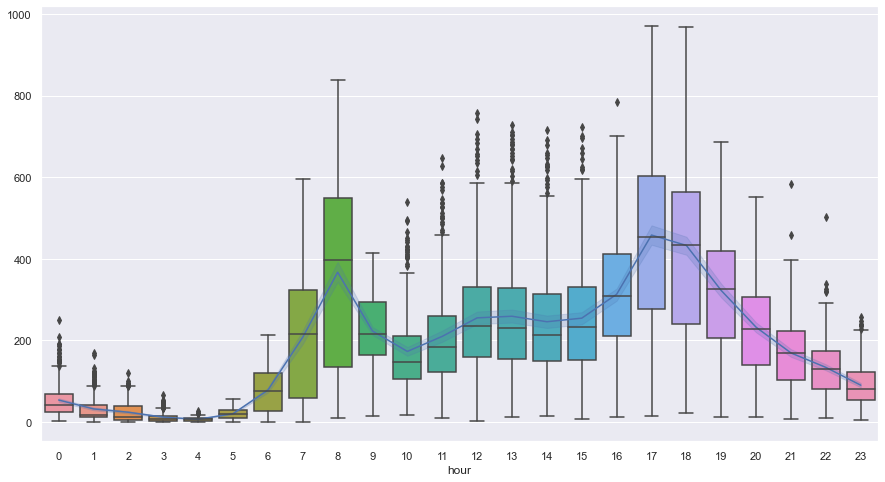

In [24]:
sns.set_theme(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = xtrain['hour'], y = (xtrain['casual'] + xtrain['registered']), ax= ax)
sns.lineplot(x = xtrain['hour'], y = (xtrain['casual'] + xtrain['registered']), ax =ax)

<AxesSubplot:xlabel='humidity', ylabel='Count'>

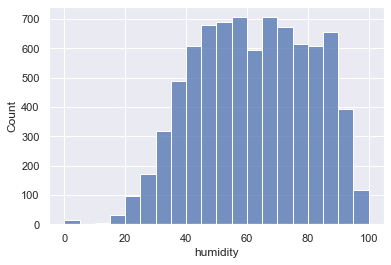

In [25]:
sns.histplot(data = xtrain, x  = 'humidity', bins= 20)

<AxesSubplot:xlabel='temp', ylabel='Count'>

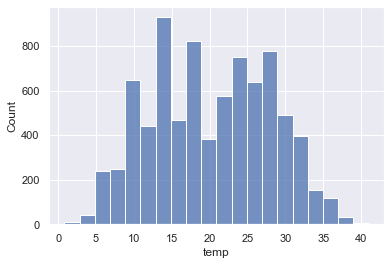

In [26]:
sns.histplot(data = xtrain, x  = 'temp', bins= 20)

<AxesSubplot:xlabel='humidity', ylabel='windspeed'>

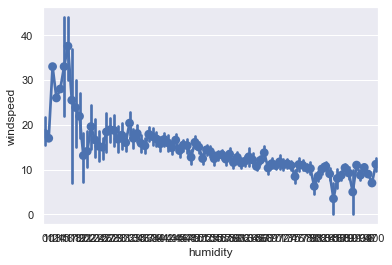

In [27]:
sns.pointplot(x = xtrain['humidity'], y = xtrain['windspeed'])

<AxesSubplot:xlabel='month'>

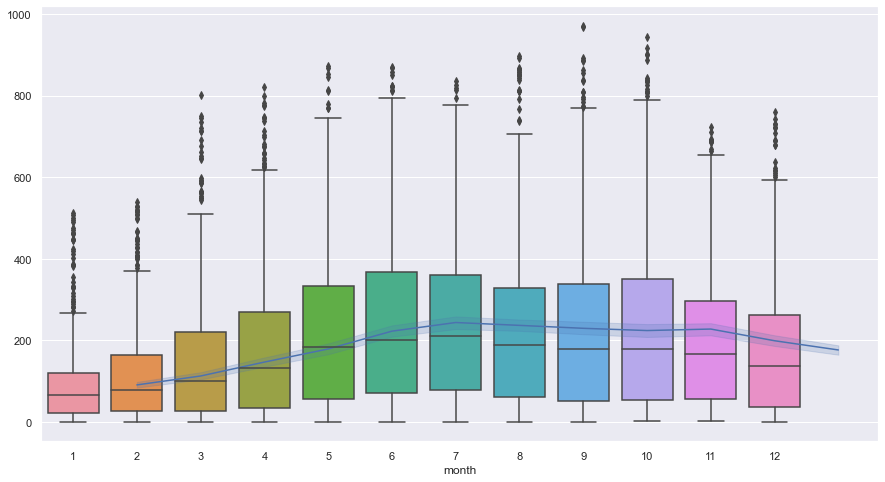

In [28]:
sns.set_theme(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = xtrain['month'], y = (xtrain['casual'] + xtrain['registered']), ax =ax)
sns.lineplot(x = xtrain['month'], y = (xtrain['casual'] + xtrain['registered']), ax =ax)

<AxesSubplot:xlabel='hour'>

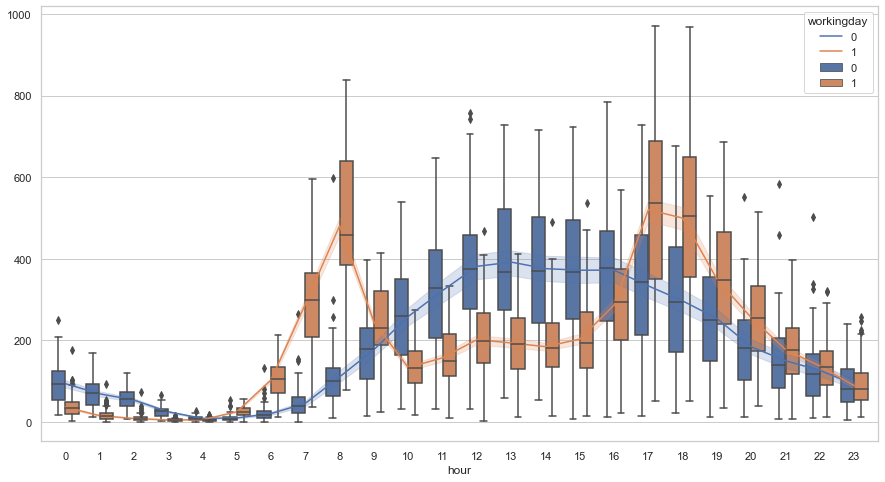

In [29]:
sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = xtrain['hour'], y = (xtrain['casual'] + xtrain['registered']), hue = xtrain['workingday'] , ax = ax)
sns.lineplot(x = xtrain['hour'], y = (xtrain['casual'] + xtrain['registered']), hue = xtrain['workingday'] , ax = ax)

In [30]:
xtrain.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,day,month,hour,week
2930,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,10,25,2011,11,7,0,28
7669,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,57,194,2012,18,5,22,20


<AxesSubplot:xlabel='hour'>

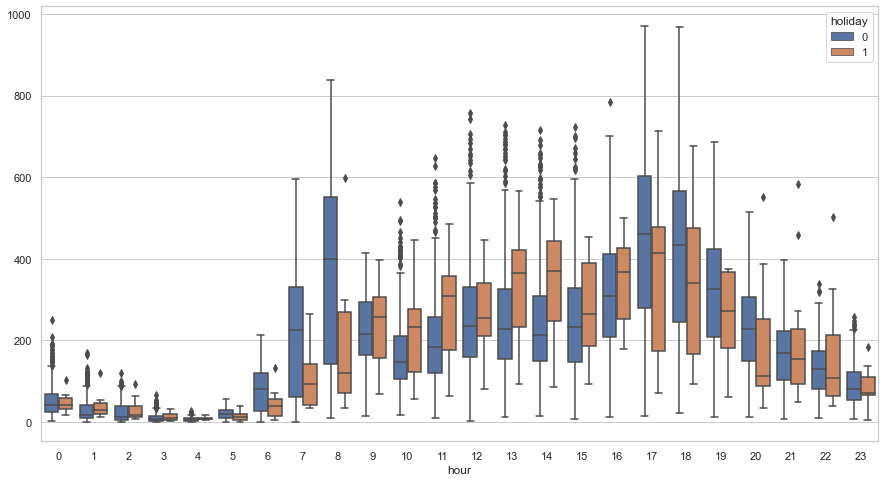

In [31]:
sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = xtrain['hour'], y = (xtrain['casual'] + xtrain['registered']), hue = xtrain['holiday'] , ax = ax)
#sns.lineplot(x = xtrain['hour'], y = (xtrain['casual'] + xtrain['registered']), hue = xtrain['holiday'] , ax = ax)

<AxesSubplot:xlabel='month'>

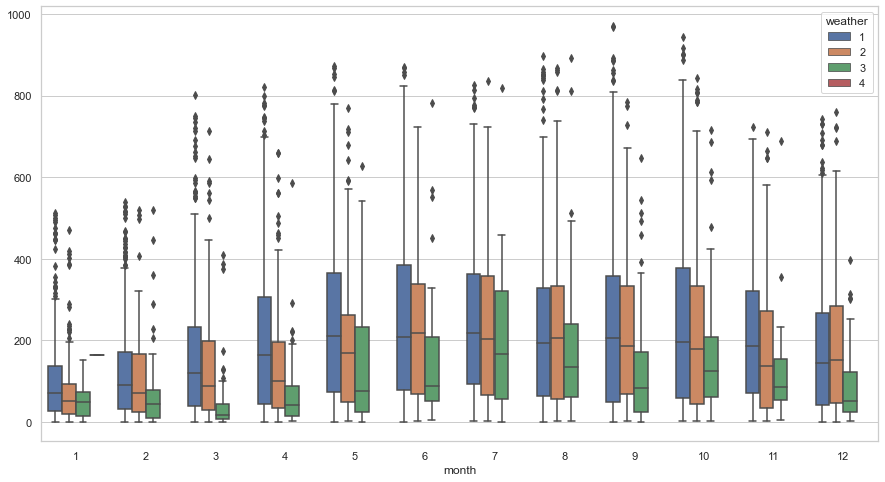

In [32]:
sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = xtrain['month'], y = (xtrain['casual'] + xtrain['registered']), hue = xtrain['weather'] , ax = ax)
#sns.lineplot(x = xtrain['month'], y = (xtrain['casual'] + xtrain['registered']), hue = xtrain['weather'] , ax = ax)


In [33]:
xtrain.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,day,month,hour,week
2930,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,10,25,2011,11,7,0,28
7669,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,57,194,2012,18,5,22,20


In [34]:
xtrain.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,day,month,hour,week
2930,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,10,25,2011,11,7,0,28
7669,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,57,194,2012,18,5,22,20


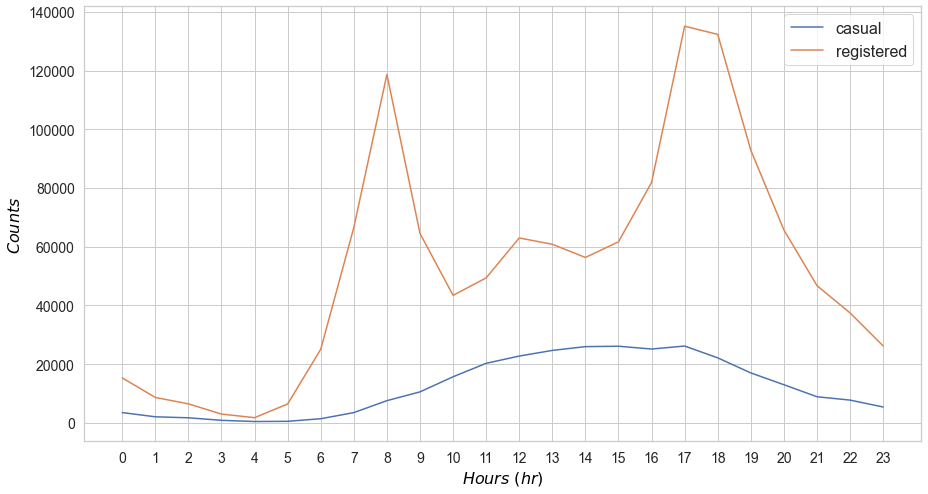

In [35]:
sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

hourly_counts = xtrain.groupby(by = ['hour']).sum()
hourly_counts.head()
hourly_counts.reset_index(inplace=True)


#ax.plot(hourly_counts['hour'], hourly_counts['casual'], 'bo', hourly_counts['hour'], hourly_counts['registered'], 'r+' )
sns.lineplot(x = hourly_counts['hour'], y = hourly_counts['casual'], markers= '*', ax = ax )
sns.lineplot(x = hourly_counts['hour'], y = hourly_counts['registered'],markers= '*', ax = ax)
#sns.scatterplot(x = hourly_counts['hour'], y = hourly_counts['casual'], ax = ax )
#sns.scatterplot(x = hourly_counts['hour'], y = hourly_counts['registered'], ax = ax)
plt.xlabel(r'$Hours$ $(hr)$', fontdict = font)
plt.ylabel(r'$Counts$ ', fontdict = font)
plt.xticks(np.arange(hourly_counts['hour'].min(), (hourly_counts['hour'].max()+1), 1), fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(['casual','registered'], prop={"size":16})


In [36]:
monthly_counts = xtrain.groupby(by = ['month']).sum()
monthly_counts.head()
monthly_counts.reset_index(inplace=True)

In [37]:
monthly_counts.head()

,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,day,hour,week
0,1,650,55,394,901,6353.36,7809.900,36059,9391.2359,5413,53579,1307479,6306,7779,3642
1,2,678,0,479,985,8050.76,9941.615,38308,9280.2437,7431,68925,1363815,6826,7815,4111
2,3,679,0,481,959,10778.90,12880.795,38305,10529.1840,18103,81535,1365808,6693,7849,6864
3,4,1330,36,435,949,12491.06,14885.265,37106,10464.1806,28266,90702,1337646,6714,7638,9703
4,5,1398,0,525,1068,15862.08,18623.535,47303,8783.0970,31771,123765,1406039,7037,8114,13202


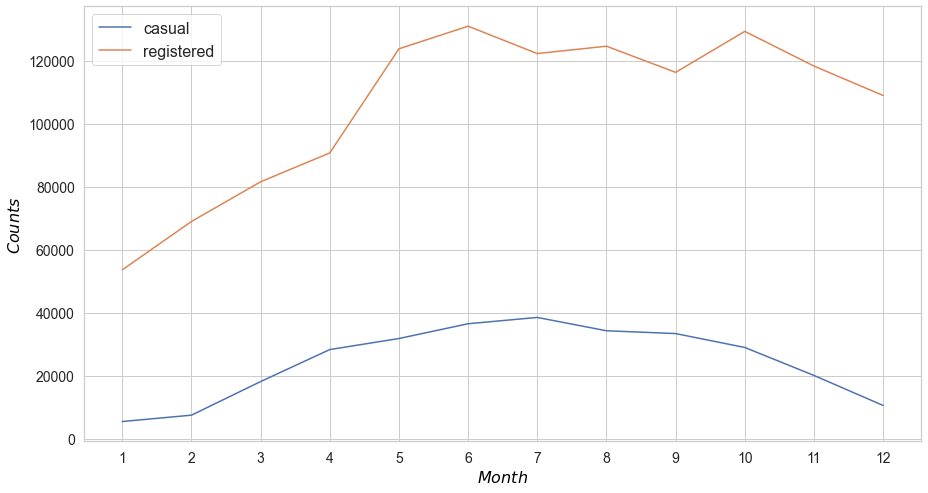

In [38]:
sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }



sns.lineplot(x = monthly_counts['month'], y = monthly_counts['casual'], markers= '*', ax = ax )
sns.lineplot(x = monthly_counts['month'], y = monthly_counts['registered'],markers= '*', ax = ax)

plt.xlabel(r'$Month$ ', fontdict = font)
plt.ylabel(r'$Counts$ ', fontdict = font)
plt.xticks(np.arange(monthly_counts['month'].min(), (monthly_counts['month'].max()+1), 1), fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(['casual','registered'], prop={"size":16})

In [39]:
xtrain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,day,month,hour,week
2930,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,10,25,2011,11,7,0,28
7669,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,57,194,2012,18,5,22,20
1346,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,12,41,2011,1,4,23,13
9432,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,70,226,2012,16,9,9,37
453,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,1,15,2011,1,2,23,5


In [40]:
grp_weather = xtrain.groupby(by = ['weather'])['casual','registered'].sum()
grp_weather.head()
grp_weather.reset_index(inplace=True)

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/2136762159.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp_weather = xtrain.groupby(by = ['weather'])['casual','registered'].sum()


In [41]:
grp_weather.head()

,weather,casual,registered
0,1,216067,892597
1,2,65806,311525
2,3,11102,64837
3,4,6,158


<AxesSubplot:xlabel='weather', ylabel='casual'>

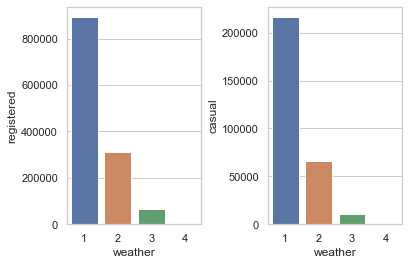

In [42]:
fig, axes = plt.subplots(1, 2)

sns.barplot(data = grp_weather, x  = 'weather', y  ='registered', ax = axes[0])
plt.subplots_adjust(hspace = 0.8, wspace = 0.5)
sns.barplot(data = grp_weather, x  = 'weather', y  ='casual',ax = axes[1])

In [43]:
grp_season = xtrain.groupby(by = ['season'])['casual','registered'].sum()
grp_season.head()
grp_season.reset_index(inplace=True)

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/3434832368.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp_season = xtrain.groupby(by = ['season'])['casual','registered'].sum()


<AxesSubplot:xlabel='season', ylabel='casual'>

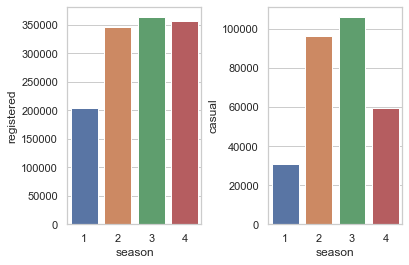

In [44]:
fig, axes = plt.subplots(1, 2)
sns.barplot(data = grp_season, x  = 'season', y  ='registered', ax = axes[0])
plt.subplots_adjust(hspace = 0.8, wspace = 0.5)
sns.barplot(data = grp_season, x  = 'season', y  ='casual', ax = axes[1])

In [45]:
grp_holiday = xtrain.groupby(by = ['holiday'])['casual','registered'].sum()
grp_holiday.reset_index(inplace=True)

C:\Users\Asus\AppData\Local\Temp/ipykernel_17664/2629218307.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp_holiday = xtrain.groupby(by = ['holiday'])['casual','registered'].sum()


In [46]:
grp_holiday.head()

,holiday,casual,registered
0,0,281062,1236803
1,1,11919,32314


<AxesSubplot:xlabel='holiday', ylabel='registered'>

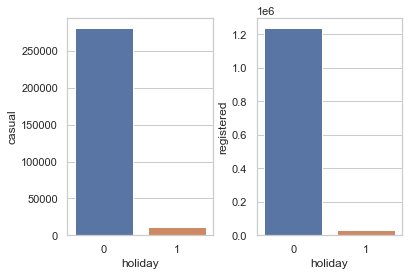

In [47]:

fig, axes = plt.subplots(1, 2)
sns.barplot(data = grp_holiday, x  = 'holiday', y  ='casual', ax = axes[0])
plt.subplots_adjust(hspace = 0.8, wspace = 0.3)
sns.barplot(data = grp_holiday, x  = 'holiday', y  ='registered', ax = axes[1])

In [48]:
xtrain.columns 

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'day',
       'month', 'hour', 'week'],
      dtype='object')

In [49]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [50]:
xtrain_cmap = xtrain[[ 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed','year', 'day',
       'month', 'hour', 'week']]
xtrain_cmap.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,day,month,hour,week
2930,3,0,1,1,28.70,32.575,65,12.9980,2011,11,7,0,28
7669,2,0,1,1,22.96,26.515,52,22.0028,2012,18,5,22,20
1346,2,0,1,1,12.30,15.910,61,6.0032,2011,1,4,23,13
9432,3,0,0,1,23.78,27.275,60,8.9981,2012,16,9,9,37
453,1,0,1,3,8.20,9.850,93,12.9980,2011,1,2,23,5


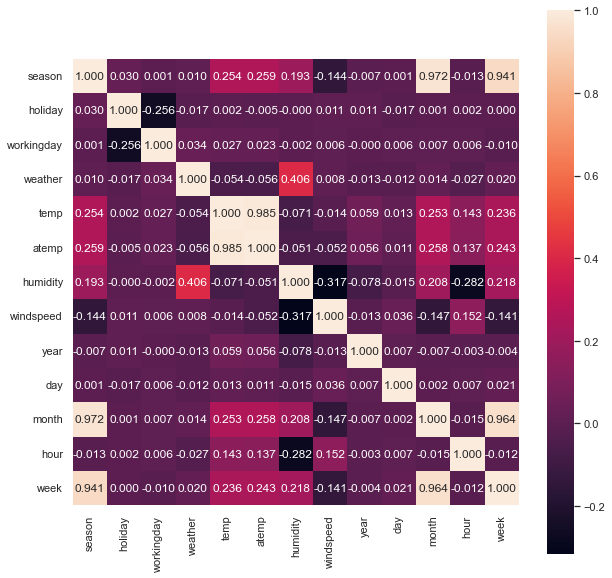

In [51]:
corrmat = xtrain_cmap.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot = True, square = True, fmt = '.3f')
plt.show()

In [52]:
xtrain_lr = xtrain[['workingday','temp','day', 
         'year','month',
       'hour']]
#xtrain_lr.head(3)


xtest_lr = xtest[['workingday','temp','day', 
         'year','month',
       'hour']]
#xtest_lr.head(3)

In [53]:
xtrain_lr = xtrain_lr.astype({'workingday':'object','year':'object','hour':'object','month':'object'})


xtest_lr = xtest_lr.astype({'workingday':'object','year':'object','hour':'object','month':'object'})


In [54]:
categorical_col = xtrain_lr.select_dtypes(include='object').columns
numeric_col = xtrain_lr.select_dtypes(include='number').columns

In [55]:
numeric_col

Index(['temp', 'day'], dtype='object')

In [56]:
# Defining transformer
ohe = OneHotEncoder()
scaler = MinMaxScaler()
scaler_rob = RobustScaler()
transformers = [('ohe', OneHotEncoder(drop = 'first'), categorical_col),
               ('scaler', MinMaxScaler(), ['temp', 'day'])]

In [57]:
# Define column transformer
column_transformer = ColumnTransformer(
    transformers=transformers, remainder='drop')


In [58]:
pipe1 = Pipeline(steps=[('coltransf1',column_transformer),
            
                        ('model1',LinearRegression())])


In [59]:
#pipe1

In [60]:
pipe1.fit(xtrain_lr, ytrain)

Pipeline(steps=[('coltransf1',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['workingday', 'year', 'month', 'hour'], dtype='object')),
                                                 ('scaler', MinMaxScaler(),
                                                  ['temp', 'day'])])),
                ('model1', LinearRegression())])

In [61]:
print(f"""The train accuracy of pipeline 1 is: {round(pipe1.score(xtrain_lr, ytrain),2)}
The test accuracy of pipeline 1 is: {round(pipe1.score(xtest_lr, ytest),2)}""")

The train accuracy of pipeline 1 is: 0.67
The test accuracy of pipeline 1 is: 0.67


In [62]:
polynomial_features = PolynomialFeatures(degree= 2, interaction_only=True)

lr2 = LinearRegression()

In [63]:
pipe2 = Pipeline([('col_tr',column_transformer),
                  ('polynomial_features', polynomial_features),
                 ('linear_reg',lr2)])

In [64]:
pipe2.fit(xtrain_lr, ytrain)

Pipeline(steps=[('col_tr',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['workingday', 'year', 'month', 'hour'], dtype='object')),
                                                 ('scaler', MinMaxScaler(),
                                                  ['temp', 'day'])])),
                ('polynomial_features',
                 PolynomialFeatures(interaction_only=True)),
                ('linear_reg', LinearRegression())])

In [65]:
print(f"""The train accuracy of pipeline 1 is: {round(pipe2.score(xtrain_lr, ytrain),3)}
The test accuracy of pipeline 1 is: {round(pipe2.score(xtest_lr, ytest),3)}""")

The train accuracy of pipeline 1 is: 0.897
The test accuracy of pipeline 1 is: 0.883


In [66]:
#polynomial_features.get_feature_names()

In [74]:
m_lasso = Lasso(alpha=0.025, random_state=50)

In [75]:
pipe3 = Pipeline([('col_tr',column_transformer),
                  ('polynomial_features', polynomial_features),
                 ('m_lass',m_lasso)])

In [76]:
#m_lasso.fit(column_transformer.fit_transform(xtrain_lr), ytrain)
pipe3.fit(xtrain_lr, ytrain)

Pipeline(steps=[('col_tr',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['workingday', 'year', 'month', 'hour'], dtype='object')),
                                                 ('scaler', MinMaxScaler(),
                                                  ['temp', 'day'])])),
                ('polynomial_features',
                 PolynomialFeatures(interaction_only=True)),
                ('m_lass', Lasso(alpha=0.025, random_state=50))])

In [77]:
#ypred_lasso = m_lasso.predict(column_transformer.transform(xtest_lr))
ypred_lasso = pipe3.predict(xtest_lr)

In [80]:
#m_lasso_r2 = m_lasso.score(column_transformer.fit_transform(xtrain_lr), ytrain)
#m_lasso_r2_t = m_lasso.score(column_transformer.transform(xtest_lr), ytest)
#m_lasso_rmse = np.sqrt(mean_squared_error(ytest,ypred_lasso))
#m_lasso_mae = np.sqrt(mean_absolute_error(ytest,ypred_lasso))

pipe3.score(xtrain_lr, ytrain) , pipe3.score(xtest_lr, ytest)

(0.8926698526177337, 0.8806251918423256)

In [71]:
print('m_lasso_r2:', m_lasso_r2)
print('m_lasso_r2_t:', m_lasso_r2_t)
print('m_lasso_mae:',m_lasso_mae)
print('*'*100)

m_lasso_r2: 0.6745327700096749
m_lasso_r2_t: 0.6651651537336467
m_lasso_mae: 8.778619756822106
****************************************************************************************************
